# Implementnig a fully connected neural network with arbitrary number of hidden layers and number of neurons in the hidden layers

### Credit to Stanford CS231n: Convolutional Neural Networks for Visual Recognition for some sample code and for designing this project

Sigmoid Activation function is used for the hiddent layers 

Softmax Activation function is used for the output layer 

Softmax Loss function is used

In [32]:
# As usual, a bit of setup
import numpy as np
import matplotlib.pyplot as plt
from fcnet import *
from sklearn import datasets

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots

# Load dataset

In [33]:
iris = datasets.load_iris()
X = iris.data  # we only take the first two features.
y = iris.target

# Train test split and network training
A train test/validation split of 70% to 30% is used 

iteration 0 / 60: loss 3.290073
Validation accuracy:  0.7111111111111111


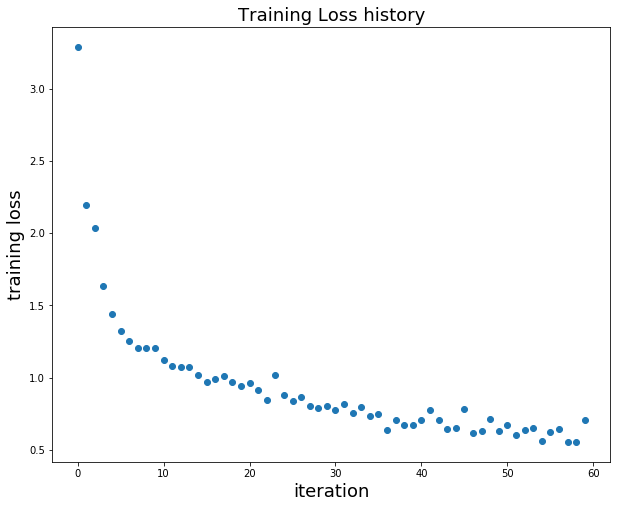

In [34]:
from sklearn.model_selection import train_test_split

X_train,X_val, y_train, y_val = train_test_split(X,y,test_size=0.3)

weight_scale = 0.6
learning_rate = 0.3
model = FullyConnectedNet([20, 20],
              weight_scale=weight_scale, input_dim=4, dtype=np.float64)

stats = model.train(X_train, y_train, X_val, y_val,
                    learning_rate=learning_rate, reg=5e-6,
                    num_iters=60, batch_size=30, verbose=True)

# Predict on the validation set
val_acc = (model.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

plt.plot(stats['loss_history'],'o')
plt.xlabel('iteration', fontsize=18)
plt.ylabel('training loss', fontsize=18)
plt.title('Training Loss history', fontsize=18)
plt.show()

# Hyperparameter Tuning

In [35]:
best_net = None # store the best model into this 
best_val_acc = 0
best_stats = None

# Hyperparameter Tuning Explanation

Hyperparameter tuning can be done in two ways - 
<li> Grid search - use pre-defined parameter values and iterate over them and check for network accuracy.
<li> Random search - randomly sample parameter values from a range of values and check for network accuracy.

Both methods were tried. It was found that random search as proposed by Bergestra and Bengio in Random Search for Hyper-Parameter optimization is easier to implement and gives good results. This approach, used as the final approach has been shown in this notebook. The iris dataset is pretty small and therefore does not require large network capacity. The number of hidden layers is kept fixed at 2. 
The number of neurons in the hidden layers, learning rate, standard deviation while initializing the weights, and regularization strength is varied randomly over a range. 

### Number of hidden layers
Number of hidden layers are uniformly sampled from an interval (20, 30)

### Learning Rate
Learning rate is chosen from an interval (.01,0.5). This interval is determined from initial testing with different values.

### Weight Scale (weight initialization standard devitation)
Learning rate decay is chosen randomly from a uniform distribution between 0.01 and 0.5

### Regularization Strength (L2)
Regularization is chosen randomly by sampling from a uniform distribution in interval (0.1, 0.3)

The parameter ranges are chosen by experimenting with different values of individual parameters and determining the most plausible range. 60 iterations are performed randomly picking the hyperparameters, training the network, and checking the validation accuracy. The network with best validation accuracy is chosen as the best network and the corresponding parameters are stored as the best parameters.

In [36]:
best_val_acc = 0
best_params = {}
for i in range(100):
    hidden_size_ = int(np.random.uniform(20,30))
    weight_scale = np.random.uniform(0.01,0.5)
    learning_rate = np.random.uniform(0.01,0.5)
    
    net_tune =  FullyConnectedNet([hidden_size_, hidden_size_],
                weight_scale=weight_scale, input_dim=4, dtype=np.float64) 
    
    regularization = np.random.uniform(0.1,0.3)

    # Train the network
    stats = net_tune.train(X_train, y_train, X_val, y_val,
            learning_rate=learning_rate, reg=regularization,
            num_iters=60, batch_size=30, verbose=False)
    
    # Predict on the validation set
    val_acc = (net_tune.predict(X_val) == y_val).mean()
    print('Validation accuracy: ', val_acc, 'Hidden_layers: ', hidden_size_, 'Learning Rate: ', learning_rate, 
          'Regularization: ', regularization, 'Weight_scale: ', weight_scale)

    if val_acc > best_val_acc:
        best_net = net_tune
        best_val_acc = val_acc
        best_stats = stats
        best_params = {'hidden_size': hidden_size_, 'learning_rate': learning_rate, 'regularization': regularization, 
                       'weight_scale': weight_scale}

Validation accuracy:  0.28888888888888886 Hidden_layers:  25 Learning Rate:  0.15269389224515229 Regularization:  0.180646950923221 Weight_scale:  0.0619770067657747
Validation accuracy:  0.28888888888888886 Hidden_layers:  28 Learning Rate:  0.16626831277567303 Regularization:  0.14382227583184032 Weight_scale:  0.10038194440633491
Validation accuracy:  0.5777777777777777 Hidden_layers:  23 Learning Rate:  0.2003342970139392 Regularization:  0.249438450342198 Weight_scale:  0.26177031576630666
Validation accuracy:  0.7111111111111111 Hidden_layers:  27 Learning Rate:  0.16589271119191107 Regularization:  0.16503607051549493 Weight_scale:  0.4141896925119393
Validation accuracy:  0.9777777777777777 Hidden_layers:  22 Learning Rate:  0.2722322184696521 Regularization:  0.13077563429028344 Weight_scale:  0.3317074948408626
Validation accuracy:  0.6444444444444445 Hidden_layers:  23 Learning Rate:  0.23965179861475888 Regularization:  0.29946589817665215 Weight_scale:  0.2847685116293946


Validation accuracy:  0.6888888888888889 Hidden_layers:  25 Learning Rate:  0.43181663090636807 Regularization:  0.17680079143094607 Weight_scale:  0.10875889278883226
Validation accuracy:  0.7777777777777778 Hidden_layers:  23 Learning Rate:  0.10096418906570512 Regularization:  0.16300523263945357 Weight_scale:  0.3591054125074815
Validation accuracy:  0.7111111111111111 Hidden_layers:  21 Learning Rate:  0.15208693131640097 Regularization:  0.15958894817908248 Weight_scale:  0.37997743062021183
Validation accuracy:  0.28888888888888886 Hidden_layers:  23 Learning Rate:  0.05671308506769174 Regularization:  0.17209137086379067 Weight_scale:  0.18360273838819868
Validation accuracy:  0.28888888888888886 Hidden_layers:  26 Learning Rate:  0.05427696250549386 Regularization:  0.1335892756151232 Weight_scale:  0.29999913441770454
Validation accuracy:  0.9333333333333333 Hidden_layers:  25 Learning Rate:  0.2505414255599941 Regularization:  0.23940708245390555 Weight_scale:  0.43557461391

In [37]:
print('Best validation accuracy', best_val_acc)
print('Corresponding Best Parameters', best_params)

Best validation accuracy 0.9777777777777777
Corresponding Best Parameters {'hidden_size': 22, 'learning_rate': 0.2722322184696521, 'regularization': 0.13077563429028344, 'weight_scale': 0.3317074948408626}


# Train the best network for 200 epochs

In [40]:
best_net = FullyConnectedNet([best_params['hidden_size'], best_params['hidden_size']],
           weight_scale=best_params['weight_scale'], input_dim=4, dtype=np.float64) 

stats = best_net.train(X_train, y_train, X_val, y_val,
            learning_rate=best_params['learning_rate'], reg=best_params['regularization'],
            num_iters=200, batch_size=30, verbose=False)

# Predict on the validation set
val_acc = (best_net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

Validation accuracy:  0.9111111111111111


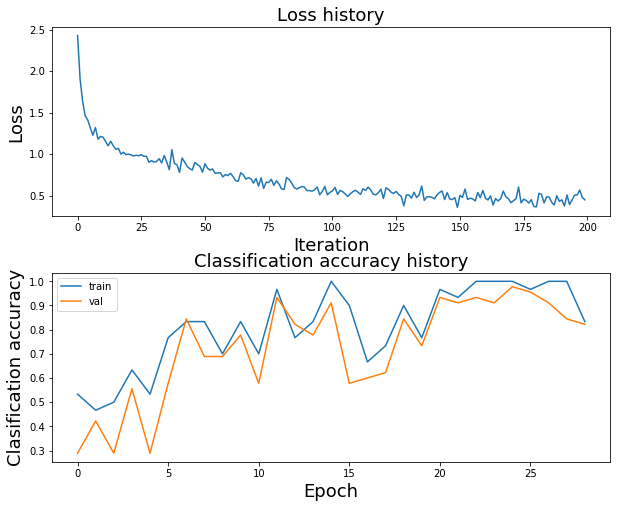

In [41]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history', fontsize=18)
plt.xlabel('Iteration', fontsize=18)
plt.ylabel('Loss', fontsize=18)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history', fontsize=18)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Clasification accuracy', fontsize=18)
plt.legend()
plt.show()